In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
#Cargue dataset
DataTitanic = pd.read_csv ('c:/Users/sharo/Titanic-Dataset.csv')

In [8]:
# Lectura de Datos
DataTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# REGRESIÓN LOGISTICA

In [9]:
DataTitanic.shape

(891, 12)

In [10]:
DataTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
DataTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ENTRENAMIENTO DEL MODELO

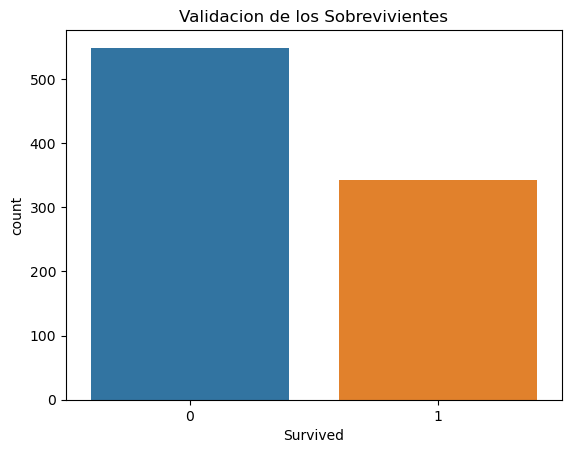

In [19]:
sns.countplot(x='Survived', data=DataTitanic)
plt.title('Validacion de los Sobrevivientes')
plt.show()

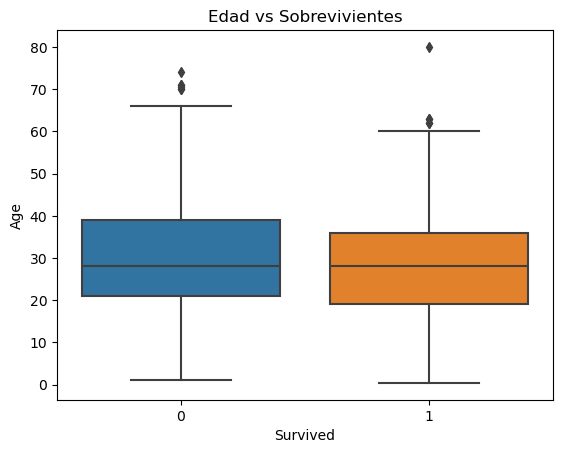

In [18]:
sns.boxplot(x='Survived', y='Age', data=DataTitanic)
plt.title('Edad vs Sobrevivientes')
plt.show()

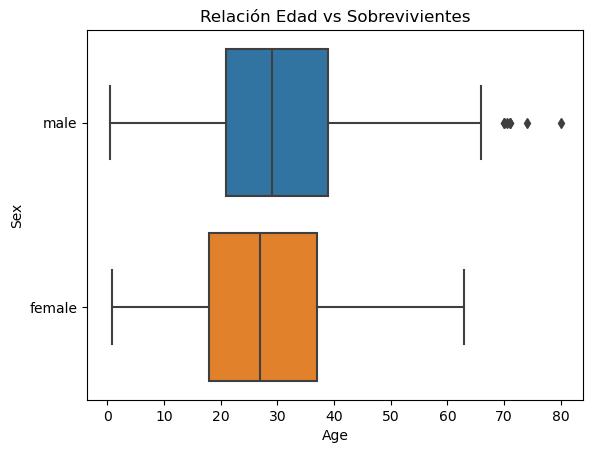

In [26]:
sns.boxplot(x='Age', y='Sex', data=DataTitanic)
plt.title('Relación Edad vs Sobrevivientes')
plt.show()

In [28]:
DataTitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# Valores faltantes en EDAD
DataTitanic['Age'].fillna(DataTitanic['Age'].mean(), inplace=True)

# Valores faltantes en 'ABORDAJE'
DataTitanic['Embarked'].fillna(DataTitanic['Embarked'].mode()[0], inplace=True)

# Valores faltantes en 'CABINA'
DataTitanic.drop(columns=['Cabin'], inplace=True)

In [31]:
# Convercion de variables categóricas a variables dummy
DataTitanic = pd.get_dummies(DataTitanic, columns=['Sex', 'Embarked'], drop_first=True)

In [32]:
# Selección de características
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = DataTitanic[features]
y = DataTitanic['Survived']

In [34]:
# División del dataset para los entrenamiento y pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression

# Inicializar del modelo
model = LogisticRegression(max_iter=1000)

# Entrenamiento sel modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# Predicciones del conjunto de datos
y_pred = model.predict(X_test)

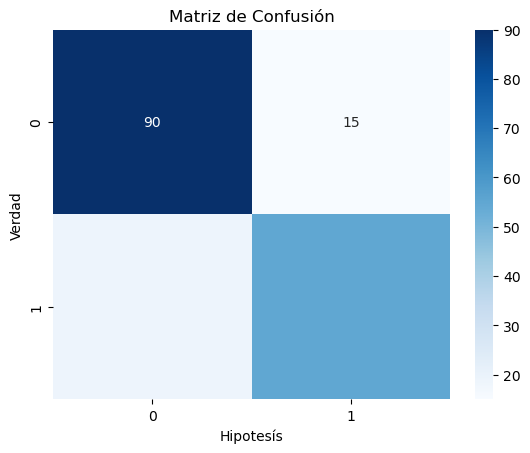

In [39]:
# Verificacion de la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Hipotesís')
plt.ylabel('Verdad')
plt.show()

In [40]:
# Informe
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



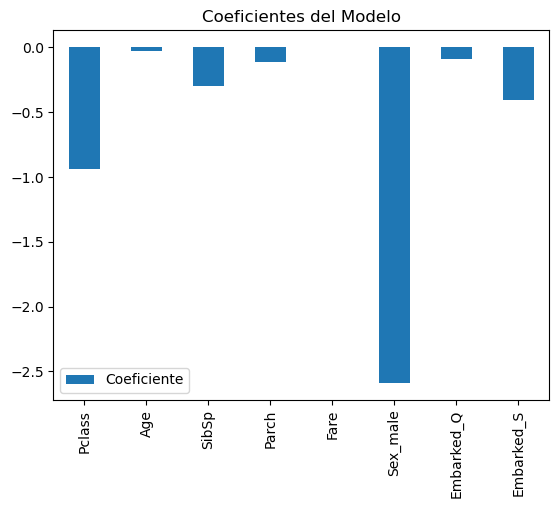

In [43]:
# Validación de coeficientes
coefficients = pd.DataFrame(model.coef_.flatten(), features, columns=['Coeficiente'])
coefficients.plot(kind='bar')
plt.title('Coeficientes del Modelo')
plt.show()

In [44]:
# Verificación de coeficientes segun correlación
print(coefficients)

            Coeficiente
Pclass        -0.941093
Age           -0.031370
SibSp         -0.297538
Parch         -0.110741
Fare           0.002542
Sex_male      -2.590112
Embarked_Q    -0.091951
Embarked_S    -0.407698
